# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Thinh Nguyen

Datum: 19.11.2023

Gruppe: 100

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann das Newtonsche Abkühlungsgesetz in diesem 10 minütigen Versuch bestätigt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.



![versuch_NA.jpg](figures/versuch_NA.jpg)
Ich habe heißes Wasser aus dem Wasserkocher in eine Tasse gefüllt. Einen Temperatursensor habe ich in die Tasse gelegt. Der andere Temperatursensor ruht in Raumtemperatur. Anschließend den Versuch etwa zehn Minuten laufen lassen.

## Versuchsauswertung

In [50]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [51]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path = '/home/jovyan/work/calorimetry_home/archive/Newton_Experiment/Newton_Experiment.h5'

# DONE #

In [52]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

file = h5py.File(path, "r")

author = file.attrs["authors"]
created = file.attrs["created"]
experiment = file.attrs["experiment"]
group_number= file.attrs["group_number"]

keys = file['RawData']['sensors'].keys()

print(keys)

print(file['RawData'])

temperatur_sensor1 = file['RawData']['sensors']['1ee8587b-2748-6efe-a938-b83459a0122a']['temperatures'][()]

print(temperatur_sensor1)

temperatur_sensor2 = file['RawData']['sensors']['1ee8587c-2ff0-6696-99d5-3f132d260a8c']['temperatures'][()]

print(temperatur_sensor2)

timestamp_sensor1 = file['RawData']['sensors']['1ee8587b-2748-6efe-a938-b83459a0122a']['timestamps'][()]

print(timestamp_sensor1)

timestamp_sensor2 = file['RawData']['sensors']['1ee8587c-2ff0-6696-99d5-3f132d260a8c']['timestamps'][()]

print(timestamp_sensor2)
# DONE #

<KeysViewHDF5 ['1ee8587b-2748-6efe-a938-b83459a0122a', '1ee8587c-2ff0-6696-99d5-3f132d260a8c']>
<HDF5 group "/RawData" (1 members)>
[26.     25.875  25.875  25.875  25.9375 25.875  25.875  25.875  25.875
 25.875  25.875  25.8125 25.8125 25.8125 25.75   25.75   25.8125 25.75
 25.75   25.6875 25.6875 25.75   25.6875 25.625  25.5625 25.625  25.625
 25.625  25.5625 25.5    25.5625 25.5625 25.5625 25.5625 25.5    25.5
 25.5    25.4375 25.4375 25.4375 25.4375 25.4375 25.4375 25.375  25.3125
 25.3125 25.3125 25.3125 25.25   25.3125 25.25   25.25   25.25   25.25
 25.25   25.1875 25.25   25.1875 25.125  25.1875 25.125  25.1875 25.125
 25.125  25.125  25.0625 25.0625 25.0625 25.0625 25.0625 25.     25.
 25.     25.     25.     25.     25.     24.9375 24.9375 24.9375 24.875
 24.9375 24.9375 24.9375 24.875  24.875  24.875  24.875  24.875  24.875
 24.8125 24.875  24.8125 24.8125 24.8125 24.75   24.8125 24.8125 24.75
 24.75   24.75   24.75   24.6875 24.75   24.75   24.6875 24.6875 24.6875
 24.6875 2

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

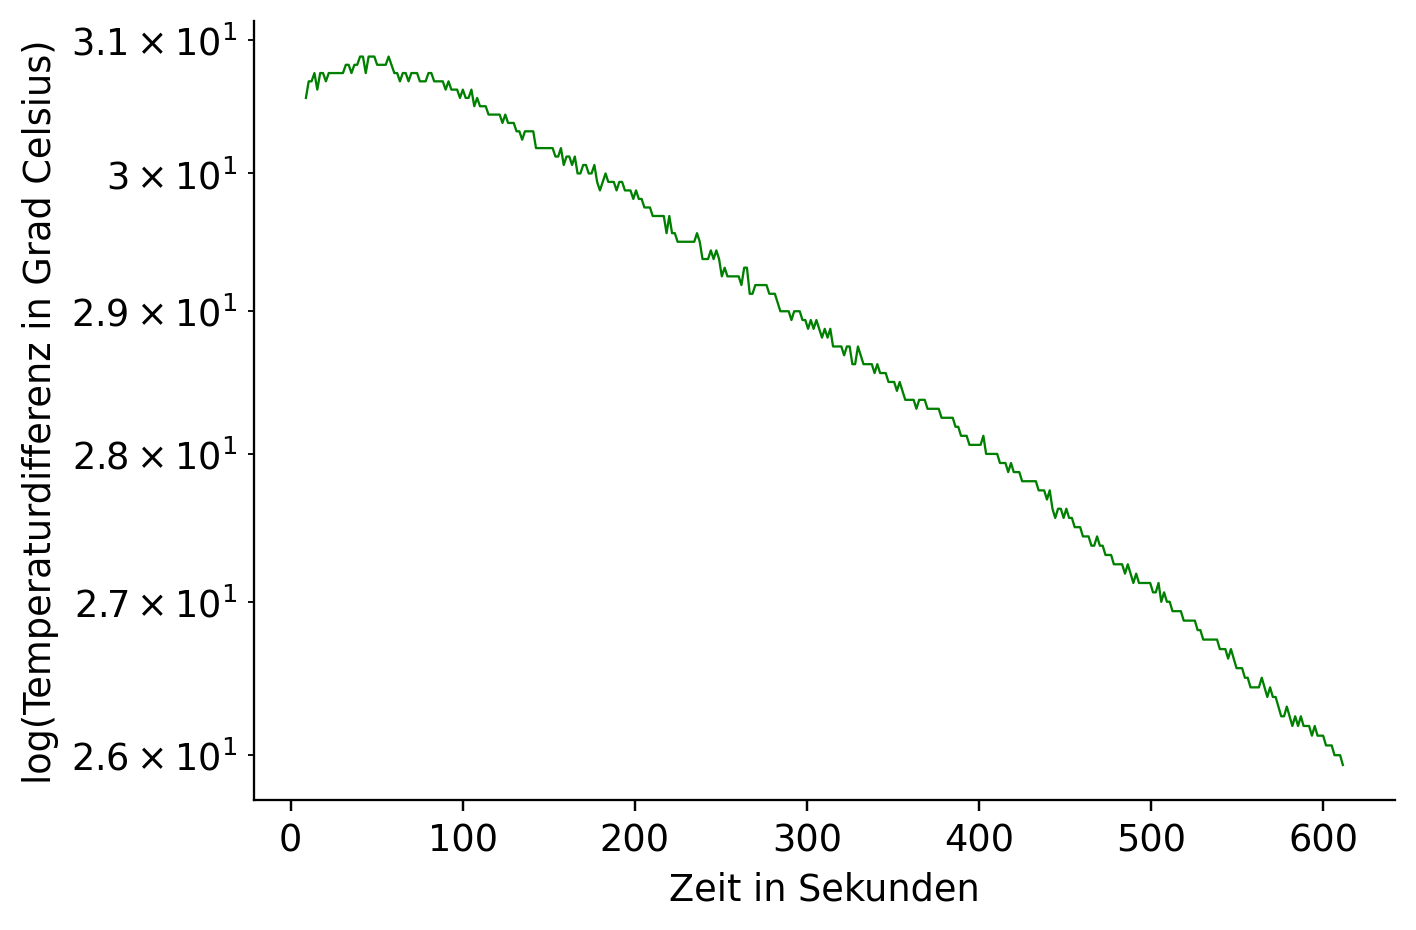

In [53]:
# TODO: Use the temperature and time data for plotting

temperatur_diff = temperatur_sensor2 - temperatur_sensor1

fig, ax = plt.subplots()

ax.plot(timestamp_sensor1, temperatur_diff,color = 'green')
ax.set_xlabel("Zeit in Sekunden")
ax.set_ylabel("log(Temperaturdifferenz in Grad Celsius)")
ax.set_yscale("log")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [70]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

T_1 = max(temperatur_sensor1)
T_2 = temperatur_sensor1[-1]
T_diff = T_1 - T_2

alpha, beta = np.polyfit(timestamp_sensor1, np.log(T_diff), 1)
K = beta

# DONE #

TypeError: expected 1D or 2D array for y

#### (iV) Ergebnis

In [56]:
# TODO: Print result

print(K)

# DONE #

NameError: name 'K' is not defined

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Man kann erkennen, dass die Abkühlungskurve einen nahezu linearen Charakter hat.Wie man dem Graphen entnehmen kann, findet man ein exponentielles Abnehmen der Temperaturdifferenz vor. Der Nachweis des Newtonschen Abkühlungsgesetzes liegt vor und somit kann die Forschungsfrage bestätigt werden. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Dank des Versuchs konnteich erfahren, wie man das Newtonsche Abkühlungsgesetz beweisen kann und auch einen guten Überblick erlangen, indem ich visuell den Graphen anzeigen ließ, womit ich analysieren konnte, wie sich die Abkühlungskurve mit der Zeit ändert.